<a href="https://colab.research.google.com/github/iIsunnyIi/Biomedical_Signal_Processing/blob/main/Final%20Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Heart Rate ECG using Python

 **1. The ECG signal is given in MATLAB file format as “givenECG3.mat”. Sampling
frequency is 360 Hz.**


### Imports

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.io
import math
import cmath
import warnings
from numpy import sin,cos,pi,exp
import scipy.fftpack as sf
import scipy.signal as sg
%matplotlib inline

### Load data

In [90]:
MAT = scipy.io.loadmat('/content/givenECG3.mat')
np.shape(MAT)
MAT

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 10 19:30:32 2017',
 '__version__': '1.0',
 'givenECG3': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

In [91]:
type(MAT)

dict

In [92]:
MAT['givenECG3']

array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)

In [93]:
ECG_Peak=MAT['givenECG3']
np.shape(ECG_Peak)

(1, 3600)

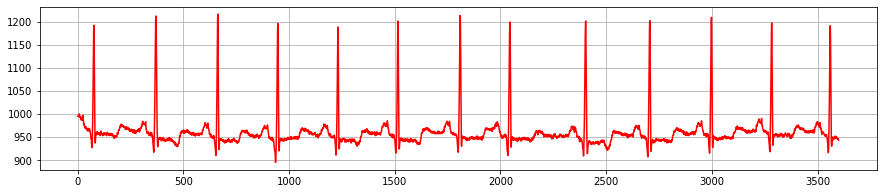

In [94]:
plt.figure(figsize=(15,3))
plt.plot(ECG,"r")
plt.grid()

####No of peak = 13

In [95]:
R_peak_count=13
print(len(ECG))

3600


In [96]:
switching_freq=360
time_covered=int(len(ECG)/switching_freq)
print(time_covered)

10


In [97]:
Realization_time=len(ECG)/switching_freq
print("Inspection Time f ECG IS    :",Realization_time)

Inspection Time f ECG IS    : 10.0


In [98]:
avg_sample_onePulse=int(len(ECG)/R_peak_count)
avg_sample_onePulse

276

###(a) Detect the R-peak in each beat of the ECG signal.

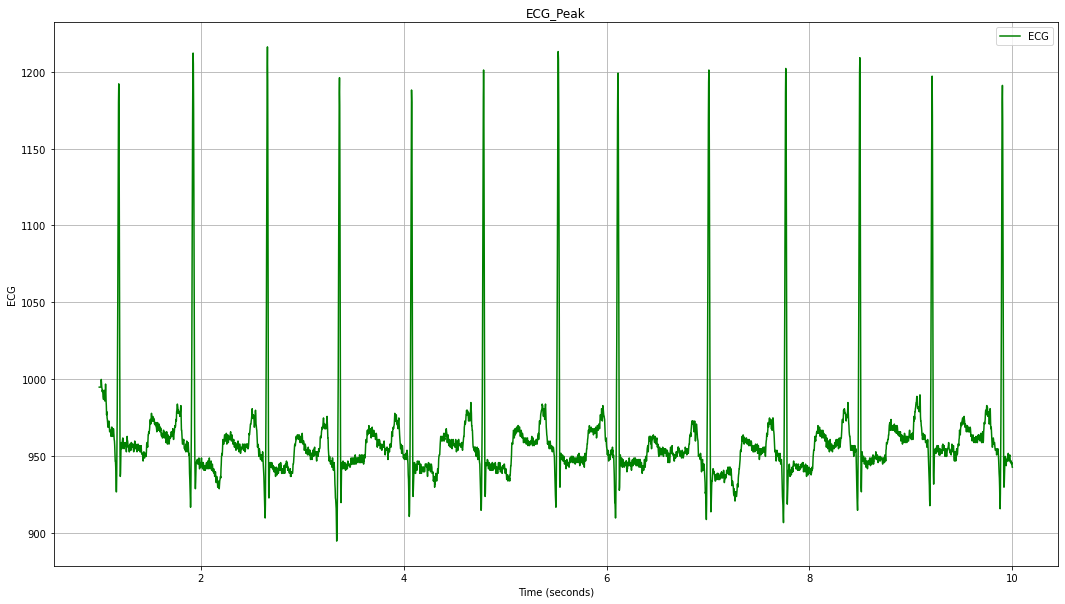

In [ ]:
sample_rate=360

t=np.linspace(1,10, sample_rate*10)
plt.figure(figsize=(18,10))
plt.plot(t,ECG_Peak.T,c='g',label='ECG')
plt.xlabel('Time (seconds)')
plt.ylabel('ECG')
plt.title('ECG_Peak')
plt.grid()
plt.legend()

plt.show()

In [ ]:
peak_samples=[]
for i in range(0,len(ECG_Peak[0])):
  if ECG_Peak[0][i]>1100 and ECG_Peak[0][i] > ECG_Peak[0][i-1] and ECG_Peak[0][i] > ECG_Peak[0][i+1]:
    print(f'Peak found at {i}th sample; Value of ECG signal : {ECG_Peak[0][i]}')
    peak_samples.append(i)

Peak found at 77th sample; Value of ECG signal : 1192
Peak found at 370th sample; Value of ECG signal : 1212
Peak found at 663th sample; Value of ECG signal : 1216
Peak found at 947th sample; Value of ECG signal : 1196
Peak found at 1231th sample; Value of ECG signal : 1188
Peak found at 1515th sample; Value of ECG signal : 1201
Peak found at 1809th sample; Value of ECG signal : 1213
Peak found at 2045th sample; Value of ECG signal : 1199
Peak found at 2403th sample; Value of ECG signal : 1201
Peak found at 2706th sample; Value of ECG signal : 1202
Peak found at 2998th sample; Value of ECG signal : 1209
Peak found at 3283th sample; Value of ECG signal : 1197
Peak found at 3560th sample; Value of ECG signal : 1191


In [99]:
Max=[]
index=[]
for i in range (1,14):
    p=0
    p=max(ECG[276*(i-1):i*276])
    Max.append(p)

Max=np.array(Max)
print("Peak found at:   ",Max)

for i in range(13):
    for t in range(276*(i),(i+1)*276):
        if(ECG[t]==Max[i]):
            index.append(t)
print("At the samples of  :", index)

Peak found at:    [1192 1212 1216 1196 1188 1201 1213 1199 1201 1202 1209 1197 1191]
At the samples of  : [77, 370, 663, 947, 1231, 1515, 1809, 2045, 2403, 2706, 2998, 3283, 3560]


##(b) Evaluate the RR-interval between the consecutive beats of the ECG signal.

In [ ]:
for i in range(1,len(peak_samples)):
  print(f'{i}th RR-interval : {(peak_samples[i]-peak_samples[i-1])/sample_rate} seconds ({peak_samples[i]-peak_samples[i-1]}) samples')


1th RR-interval : 0.8138888888888889 seconds (293) samples
2th RR-interval : 0.8138888888888889 seconds (293) samples
3th RR-interval : 0.7888888888888889 seconds (284) samples
4th RR-interval : 0.7888888888888889 seconds (284) samples
5th RR-interval : 0.7888888888888889 seconds (284) samples
6th RR-interval : 0.8166666666666667 seconds (294) samples
7th RR-interval : 0.6555555555555556 seconds (236) samples
8th RR-interval : 0.9944444444444445 seconds (358) samples
9th RR-interval : 0.8416666666666667 seconds (303) samples
10th RR-interval : 0.8111111111111111 seconds (292) samples
11th RR-interval : 0.7916666666666666 seconds (285) samples
12th RR-interval : 0.7694444444444445 seconds (277) samples


###Other Way

In [100]:
index_diff=[]
for i in range(12):
    p=index[i+1]-index[i]
    index_diff.append(p)
    
RR_interval=index_diff
print("RR interval is",RR_interval,("sample"))

RR interval is [293, 293, 284, 284, 284, 294, 236, 358, 303, 292, 285, 277] sample


##(c) Derive the heart rate signal from the ECG (i.e., Plot between the RR-interval and time).

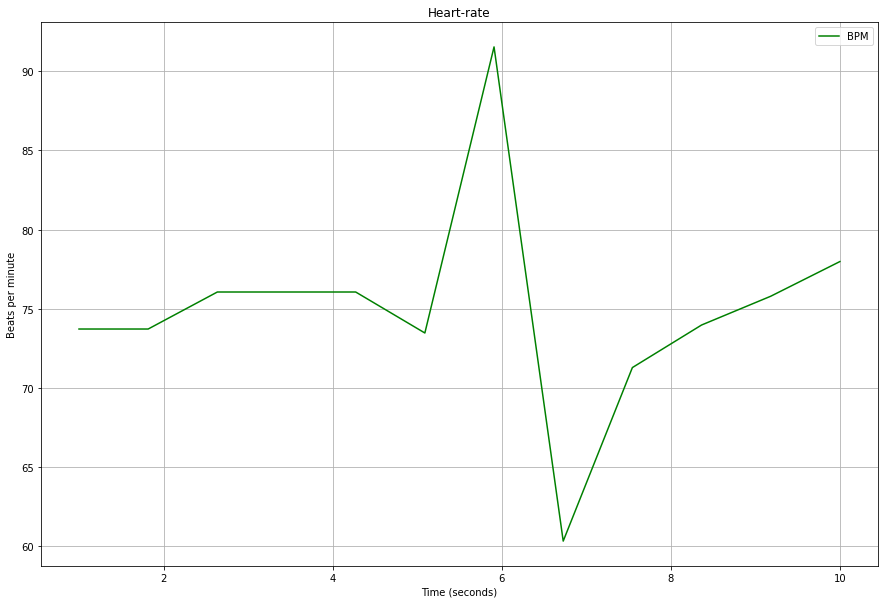

In [ ]:
bpm=[]
for i in range(1,len(peak_samples)):
  interval=(peak_samples[i]-peak_samples[i-1])/sample_rate
  bpm.append(60/interval)

t=np.linspace(1,10,len(bpm))

plt.figure(figsize=(15,10))
plt.plot(t,bpm,c='g',label='BPM')

plt.xlabel('Time (seconds)')
plt.ylabel('Beats per minute')
plt.title('Heart-rate')
plt.grid()
plt.legend()

plt.show()



In [101]:
print("Average Heart rate samples is:",np.average(np.array(index_diff)))
print("Beats per second is",360/290.25)
print("Beats per minute is",1.2403100775193798*60)

Average Heart rate samples is: 290.25
Beats per second is 1.2403100775193798
Beats per minute is 74.4186046511628


##(d) Evaluate the mean and standard deviation value of the heart rate signal.

In [102]:
HR=[]
for i in range(len(RR_interval)):
    P=(360/RR_interval[i])*60
    HR.append(P)
print("Mean of the ECG_Peak signal is :",np.mean(HR))
print(HR)

print("standard deviation of the ECG_Peak signal is:",np.std(HR))

Mean of the ECG_Peak signal is : 74.99723655197333
[73.72013651877134, 73.72013651877134, 76.05633802816902, 76.05633802816902, 76.05633802816902, 73.46938775510205, 91.52542372881355, 60.33519553072626, 71.28712871287128, 73.97260273972603, 75.78947368421052, 77.9783393501805]
standard deviation of the ECG_Peak signal is: 6.59195965553168


##2. Given an ECG signal “inputECG.mat”, add random noise to it. The sampling rate is 360 Hz. (You may use numpy.random package for generating noise)

In [103]:
mat = scipy.io.loadmat('/content/inputECG.mat')
ecg=mat['inputECG']

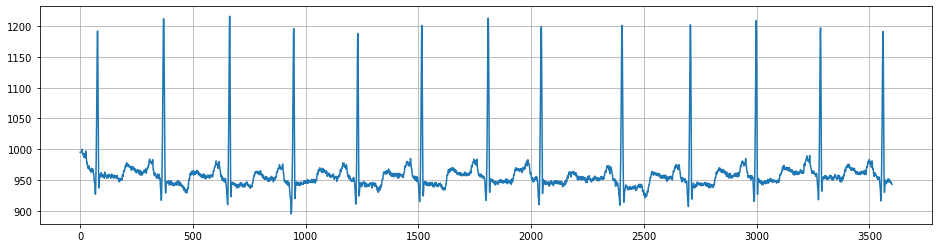

In [104]:
plt.figure(figsize=(16,4))

inp=mat['inputECG'][0]
plt.plot(inp)
plt.grid()

###Adding Noise

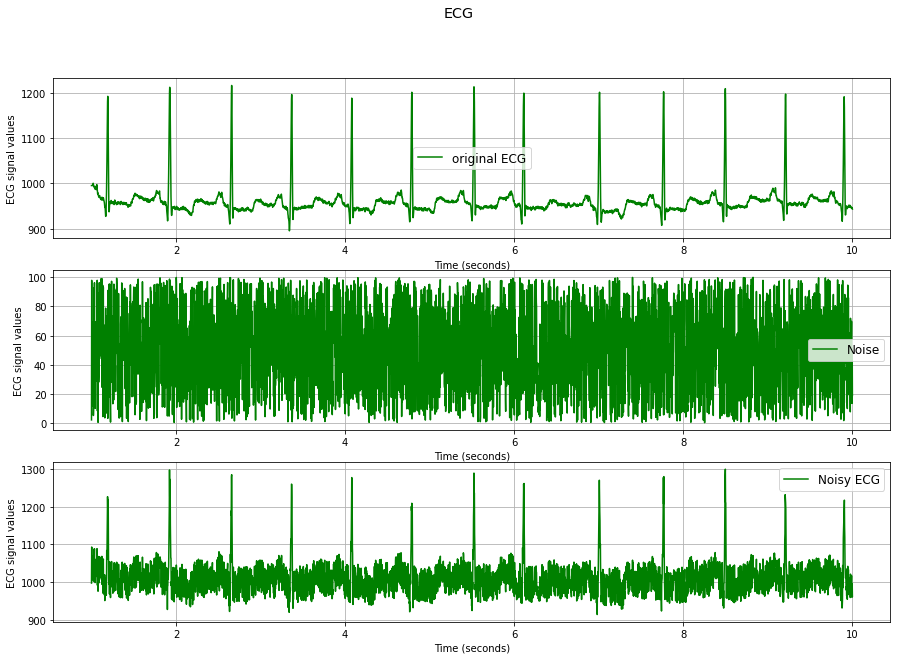

In [ ]:
sample_rate=360
noise_amp=100

fig,ax=plt.subplots(3,1,figsize=(15,10))
plt.rcParams.update({'font.size':12})
t=np.linspace(1,10, sample_rate*10)
ax[0].plot(t,ecg.T,c='g',label='original ECG')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('ECG signal values')
ax[0].grid()
ax[0].legend()

noise=np.random.rand(1,3600)*noise_amp
noisy_ecg=ecg+noise

ax[1].plot(t,noise.T,c='g',label='Noise')
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('ECG signal values')
ax[1].grid()
ax[1].legend()

ax[2].plot(t,noisy_ecg.T,c='g',label='Noisy ECG')
ax[2].set_xlabel('Time (seconds)')
ax[2].set_ylabel('ECG signal values')
ax[2].grid()
ax[2].legend()

fig.suptitle('ECG')
plt.show()

**a. Perform synchronized averaging to remove the noise. Vary the number of
realizations used for reconstruction of ECG signal. Plot the percentage
root mean square difference (PRD) value versus the iteration number.**

###Synchronous Averaging

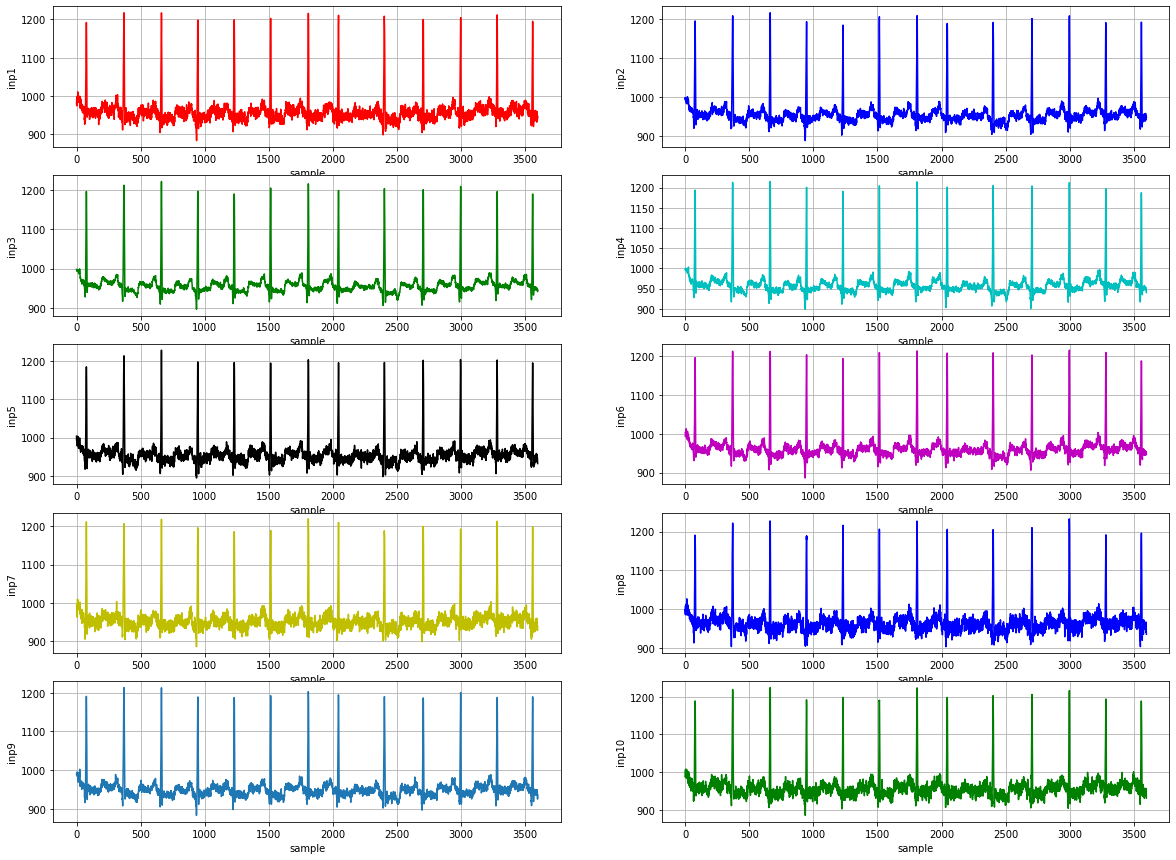

In [105]:
plt.figure(figsize=(20,15))
plt.subplot(521)
inp1=np.random.normal(0,8,3600)+ECG
plt.plot(inp1,"r")
plt.xlabel("sample")
plt.ylabel("inp1")
plt.grid()

plt.subplot(522)
inp2=np.random.normal(-1,5,3600)+ECG
plt.plot(inp2,"b")
plt.xlabel("sample")
plt.ylabel("inp2")
plt.grid()

plt.subplot(523)
inp3=np.random.normal(1,2,3600)+ECG
plt.plot(inp3,"g")
plt.xlabel("sample")
plt.ylabel("inp3")
plt.grid()

plt.subplot(524)
inp4=np.random.normal(2,3,3600)+ECG
plt.plot(inp4,"c")
plt.xlabel("sample")
plt.ylabel("inp4")
plt.grid()

plt.subplot(525)
inp5=np.random.normal(-2,7,3600)+ECG
plt.plot(inp5,"k")
plt.xlabel("sample")
plt.ylabel("inp5")
plt.grid()

plt.subplot(526)
inp6=np.random.normal(4,5,3600)+ECG
plt.plot(inp6,"m")
plt.xlabel("sample")
plt.ylabel("inp6")
plt.grid()

plt.subplot(527)
inp7=np.random.normal(-4,9,3600)+ECG
plt.plot(inp7,"y")
plt.xlabel("sample")
plt.ylabel("inp7")
plt.grid()

plt.subplot(528)
inp8=np.random.normal(7,10,3600)+ECG
plt.plot(inp8,"b")
plt.xlabel("sample")
plt.ylabel("inp8")
plt.grid()

plt.subplot(529)
inp9=np.random.normal(-7,5,3600)+ECG
plt.plot(inp9)
plt.xlabel("sample")
plt.ylabel("inp9")
plt.grid()
plt.subplot(5,2,10)
inp10=np.random.normal(0,9,3600)+ECG
plt.plot(inp10,"g")
plt.xlabel("sample")
plt.ylabel("inp10")
plt.grid()

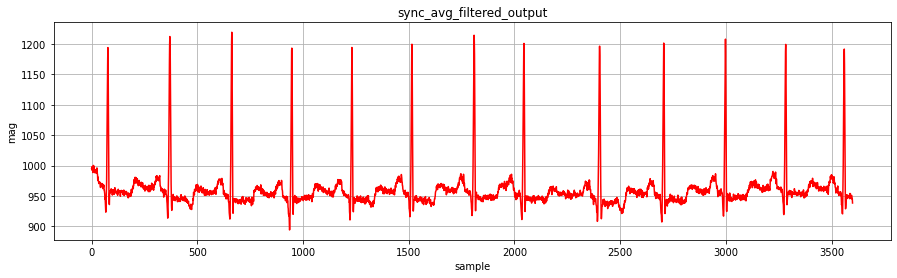

In [106]:
plt.figure(figsize=(15,4))
sync_filtered_out=(inp1+inp2+(inp3)+inp4+(inp5)+inp6+(inp7)+inp8+(inp9)+inp10)/10
plt.plot(sync_filtered_out,"r")
plt.xlabel("sample")
plt.ylabel("mag")
plt.title("sync_avg_filtered_output")
plt.grid()

In [107]:
#varrying the no of realization to get the reconstructed signal
realization=np.array([inp1,inp2,inp3,inp4,inp5,inp6,inp7,inp8,inp9,inp10])
plotting=[]
p=0
for i in range (len(realization)):
    y=realization[i]
    p=(p+y)
    plotting.append(p)

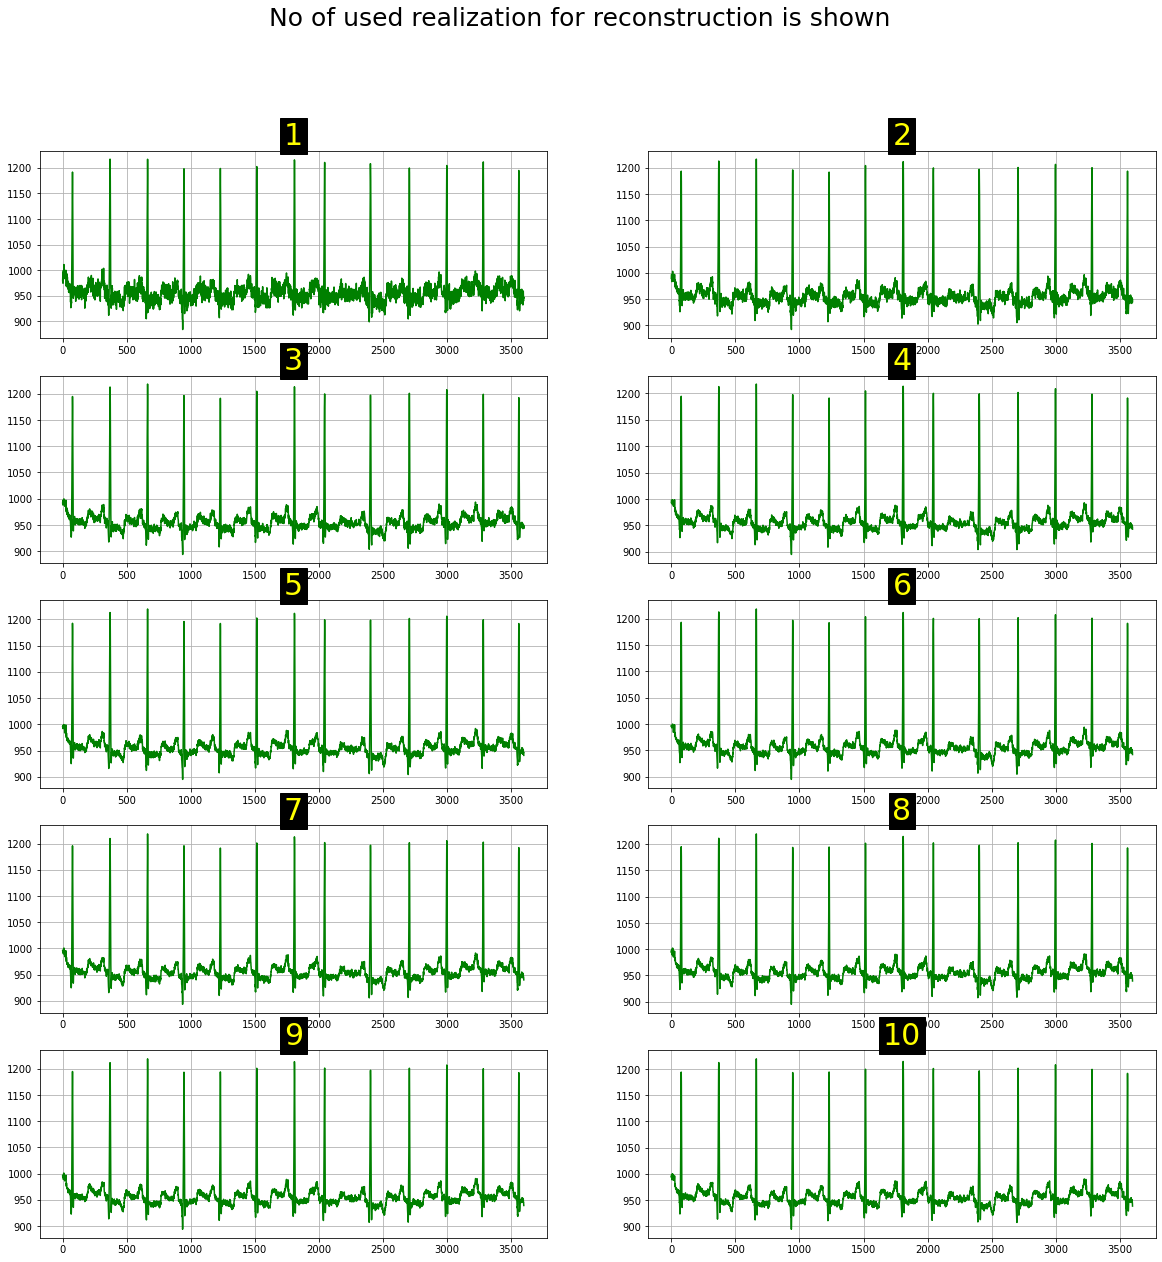

In [108]:
diff_itt_filter_output=[]
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,2,i+1)
    p=np.array(plotting[i]/(i+1))
    diff_itt_filter_output.append(p)
    plt.plot(p,"g")
    plt.suptitle('No of used realization for reconstruction is shown', fontsize=25)
    plt.title(i+1, fontsize='30', backgroundcolor='black', color='yellow') 
    plt.grid()

In [109]:
#Plot the percentage root mean square difference (PRD) value versus the iteration number
PRD=[]
for i in range(10):
    P=0
    P=sum((ECG-diff_itt_filter_output[i])**2)
    P=(P/len(ECG))**.5
    PRD.append(P)

Text(0, 0.5, 'PRD')

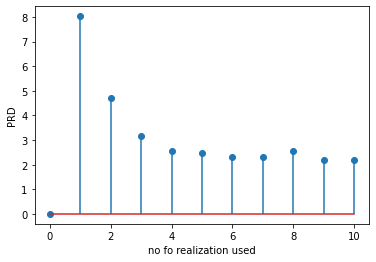

In [110]:
plt.stem(np.concatenate((np.array([0]),np.array(PRD))),use_line_collection=True)
plt.xlabel("no fo realization used")
plt.ylabel("PRD")

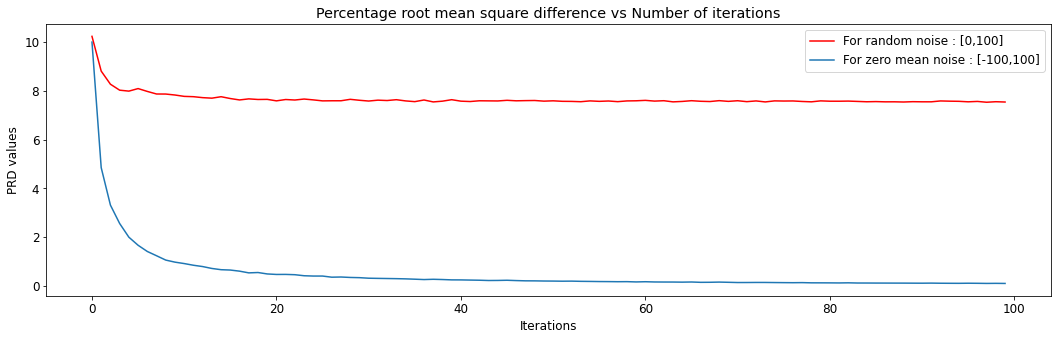

In [ ]:
## Other way to plot

def prd(x,x_hat):
  x=np.array(x)
  x_hat=np.array(x_hat)
  e=np.sum((x-x_hat)**2)
  v=np.sum(x**2)
  return (e/v)*100


num_iter=100
prd_list=[]
zero_mean_prd=[]
ecg_rms=np.sqrt(np.mean((ecg)**2))

for i in range(1,num_iter+1):
  sum_signal=np.zeros((1,3600))
  zero_mean_sum_signal=np.zeros((1,3600))

  for iter in range(i):
    zero_mean_noise=(np.random.rand(1,3600) * 2 -1)*noise_amp
    random_noise=np.random.rand(1,3600)*noise_amp
    noisy_ecg=ecg+random_noise
    sum_signal=sum_signal+noisy_ecg
    noisy_ecg=ecg+zero_mean_noise
    zero_mean_sum_signal=zero_mean_sum_signal+noisy_ecg
  sum_signal=sum_signal/i
  zero_mean_sum_signal=zero_mean_sum_signal/i
  #print(f'filtered ecg after {i} iterations : {sum_signal}')
  #rmsd=(np.sqrt(np.mean((ecg-sum_signal)**2))/ecg_rms)*100
  #rmsd=(np.sqrt(np.mean(((ecg-sum_signal)/ecg)**2)))*100
  rmsd=prd(ecg,sum_signal)
  prd_list.append(rmsd)
  #rmsd=(np.sqrt(np.mean((ecg-zero_mean_sum_signal)**2))/ecg_rms)*100
  #rmsd=(np.sqrt(np.mean(((ecg-zero_mean_sum_signal)/ecg)**2)))*100
  rmsd=prd(ecg,zero_mean_sum_signal)
  zero_mean_prd.append(rmsd)

plt.figure(figsize=(18,5))
plt.plot(np.arange(0,num_iter,1),prd_list,label=f'For random noise : [0,{noise_amp}]',c='r')
plt.plot(np.arange(0,num_iter,1),zero_mean_prd,label=f'For zero mean noise : [-{noise_amp},{noise_amp}]')
plt.xlabel('Iterations')
plt.ylabel('PRD values')
plt.legend()
plt.title('Percentage root mean square difference vs Number of iterations')
plt.show()



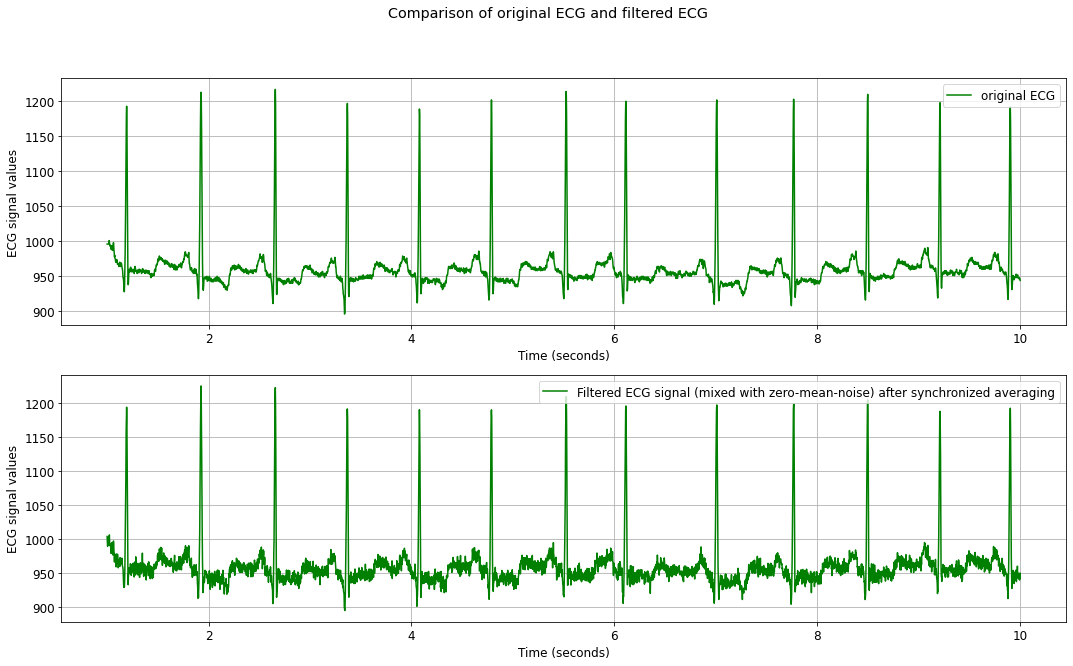

In [ ]:
## Comparison of Original & Filtered signal
fig,ax=plt.subplots(2,1,figsize=(18,10))
plt.rcParams.update({'font.size':12})
t=np.linspace(1,10, sample_rate*10)
ax[0].plot(t,ecg.T,c='g',label='original ECG')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('ECG signal values')
ax[0].grid()
ax[0].legend()

ax[1].plot(t,zero_mean_sum_signal.T,c='g',label='Filtered ECG signal (mixed with zero-mean-noise) after synchronized averaging')
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('ECG signal values')
ax[1].grid()
ax[1].legend(loc='upper right')

plt.suptitle('Comparison of original ECG and filtered ECG')
plt.show()

**3. Given the ECG signal, “givenECG3.mat”. The sampling rate is 360 Hz.
(a) Add baseline wander noise (0-1 Hz sinusoid) and powerline
interference (50 Hz sinusoid) to it. Use various filters to eliminate these
noises from ECG.
(b) Compute PRD value between the filtered signal and the original ECG
signal for each filtering case.**

In [111]:
import scipy.io
mat = scipy.io.loadmat('/content/givenECG3.mat')
ecg=mat['givenECG3']

Text(0.5, 1.0, 'ECG')

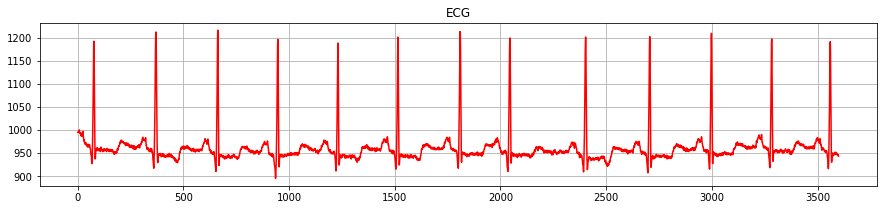

In [112]:
plt.figure(figsize=(15,3))
data=mat['givenECG3'][0]
plt.plot(data,"r")
plt.grid()
plt.title("ECG")

##Add baseline wander noise and powerline interference

Text(0.5, 1.0, 'ECG+powerline interference')

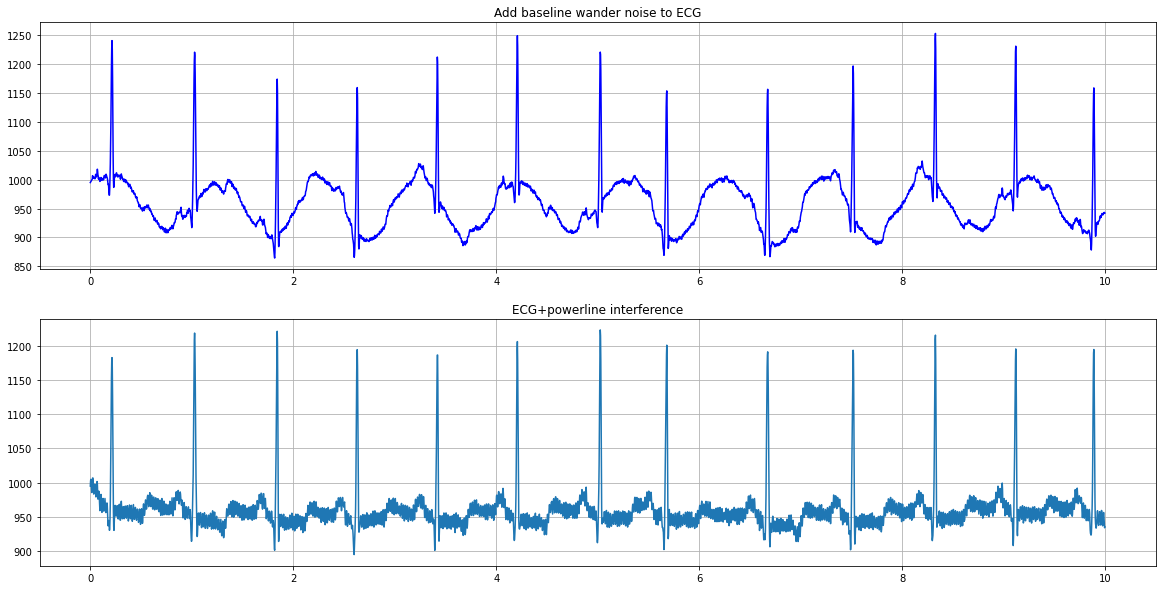

In [113]:
plt.figure(figsize=(20,10))
t=10
Fs=360
n=np.arange(0,10,1/360)
f=1
sig1=ECG+50*sin(2*pi*f*n)     #REMEMBER 10 milivolt
plt.subplot(2,1,1)
plt.plot(n,sig1,"b")
plt.grid()
plt.title("Add baseline wander noise to ECG")

#taking power line interfernce to be (1/200) times
plt.subplot(2,1,2)
f=50
sig2=ECG+10*sin(2*pi*f*n)
plt.plot(n,sig2,)
plt.grid()
plt.title("ECG+powerline interference")

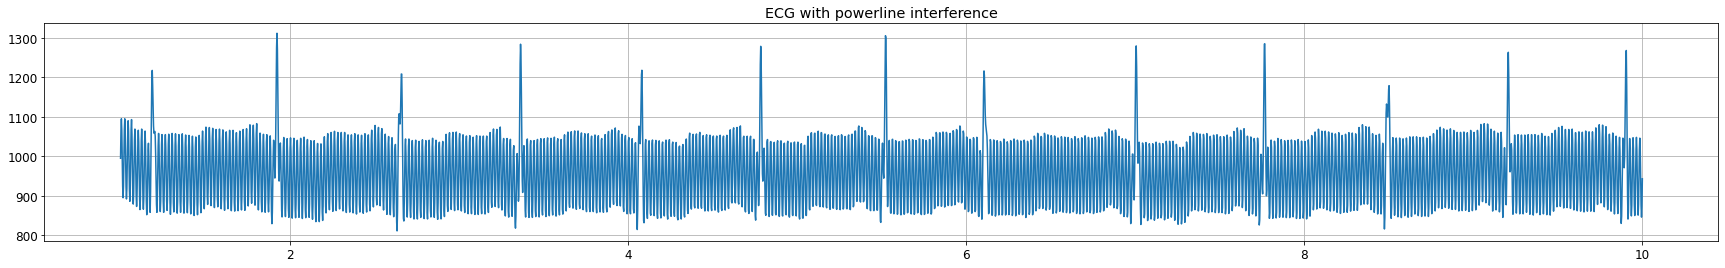

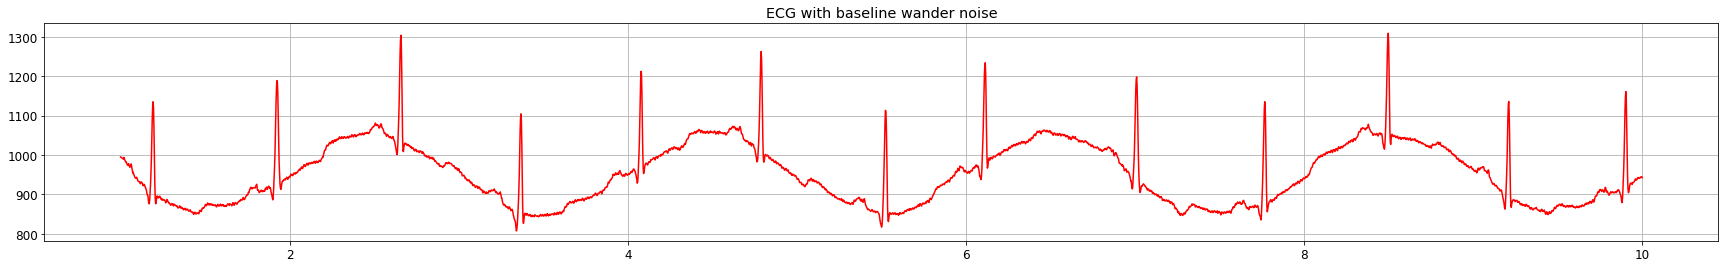

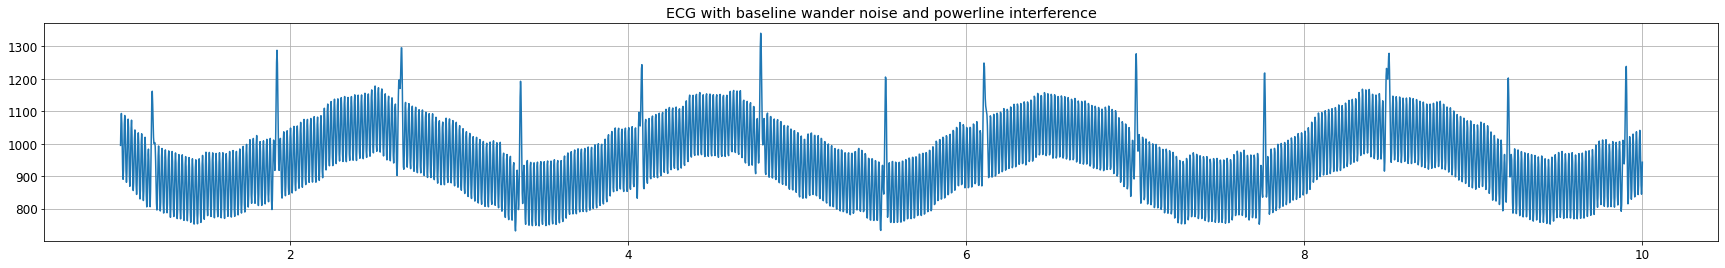

In [ ]:
baseline=100*np.sin(2*np.pi*0.5*t)
baseline_ecg=ecg+baseline

pwrline=100*np.sin(2*np.pi*50*t)   
pwrline_ecg=ecg+pwrline

pwrline=100*np.sin(2*np.pi*50*t)    
noisy_ecg=ecg+baseline+pwrline

plt.figure(figsize=(30,4))
plt.plot(t,pwrline_ecg.T)
plt.grid()
plt.title('ECG with powerline interference')
plt.show()
plt.figure(figsize=(30,4))
plt.plot(t,baseline_ecg.T,c='r')
plt.grid()
plt.title('ECG with baseline wander noise')
plt.show()
plt.figure(figsize=(30,4))
plt.plot(t,noisy_ecg.T)
plt.grid()
plt.title('ECG with baseline wander noise and powerline interference')
plt.show()

###Magnitude Spectrum Plot

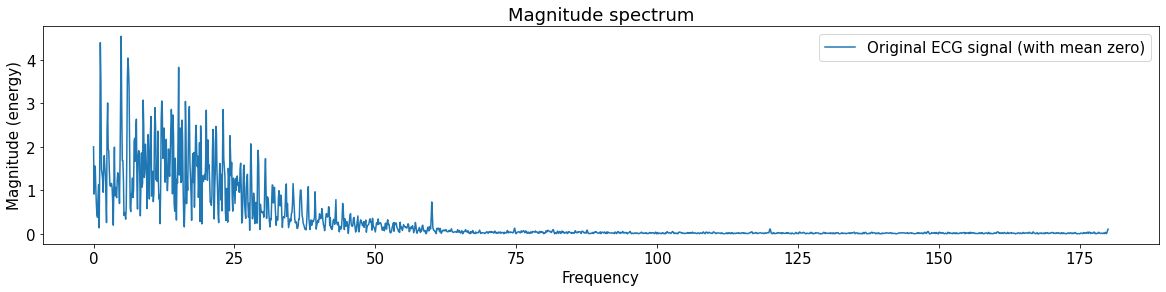

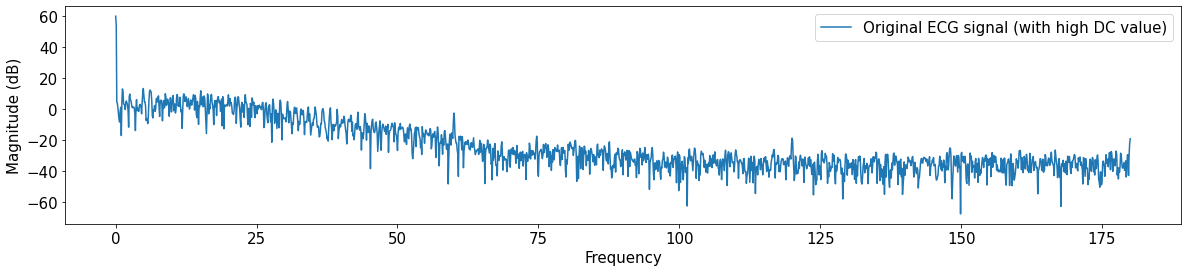

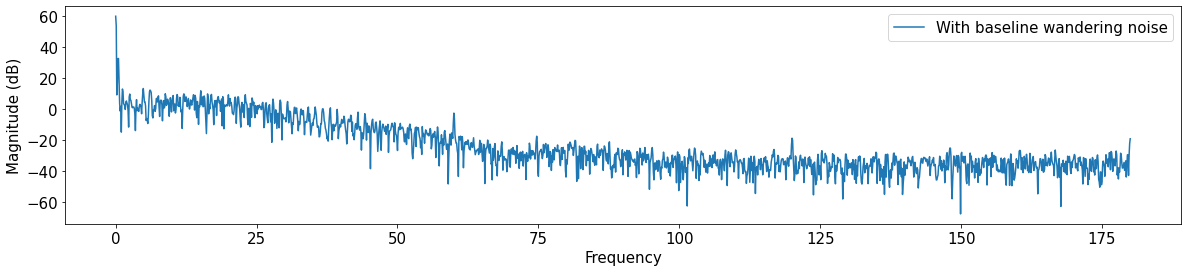

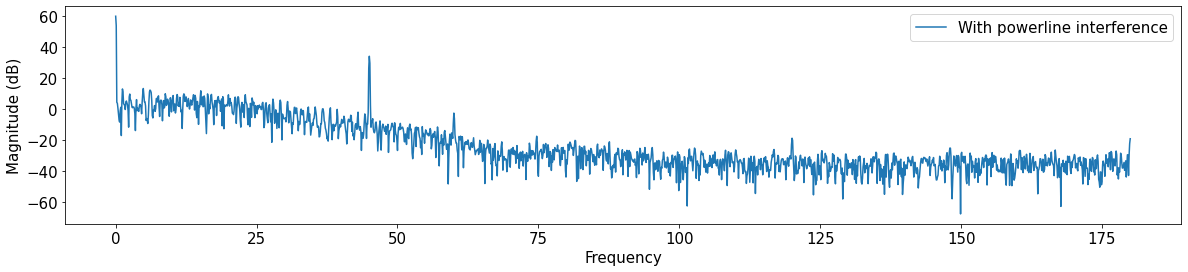

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,4))
plt.magnitude_spectrum((ecg-np.mean(ecg))[0],Fs=360,label='Original ECG signal (with mean zero)') # scale='dB'
plt.legend()
plt.title('Magnitude spectrum')
plt.show()
plt.figure(figsize=(20,4))
plt.magnitude_spectrum(ecg[0],Fs=360,label='Original ECG signal (with high DC value)',scale='dB') # scale='dB'
plt.legend()
plt.show()
plt.figure(figsize=(20,4))
plt.magnitude_spectrum(baseline_ecg[0],Fs=360,label='With baseline wandering noise',scale='dB')
plt.legend()
plt.show()
plt.figure(figsize=(20,4))
plt.magnitude_spectrum(pwrline_ecg[0],Fs=360,label='With powerline interference',scale='dB')
plt.legend()
plt.show()

###Filtering Operation

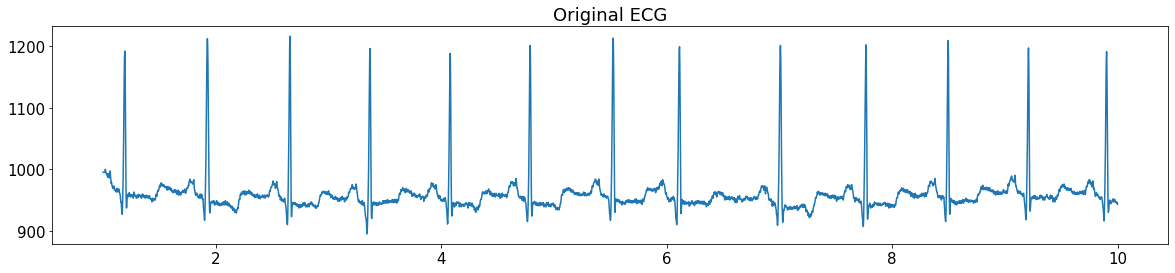

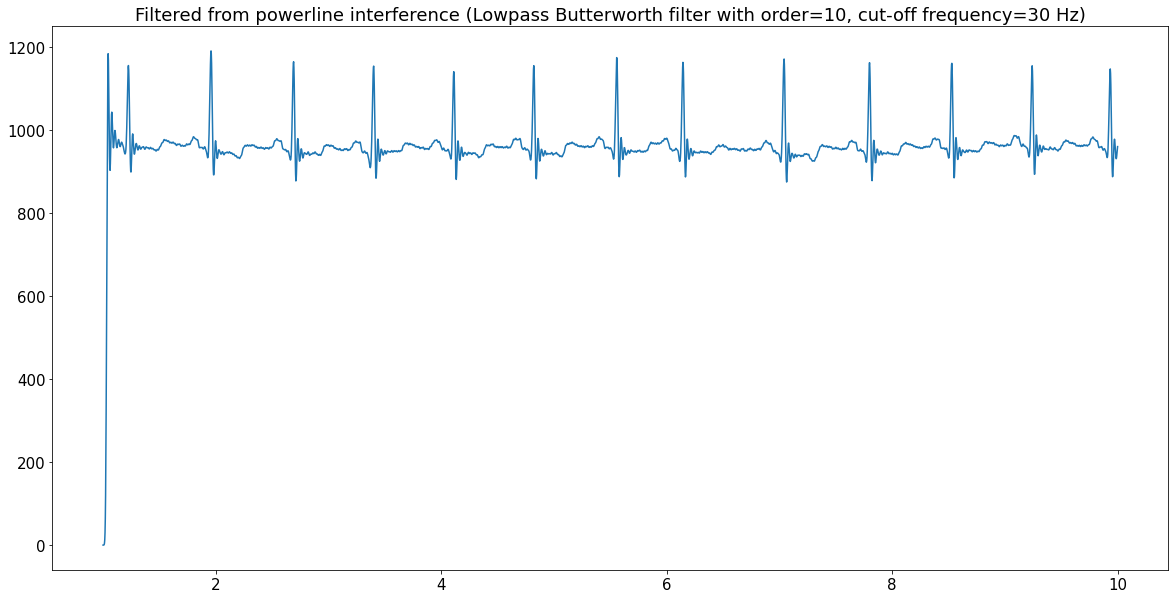

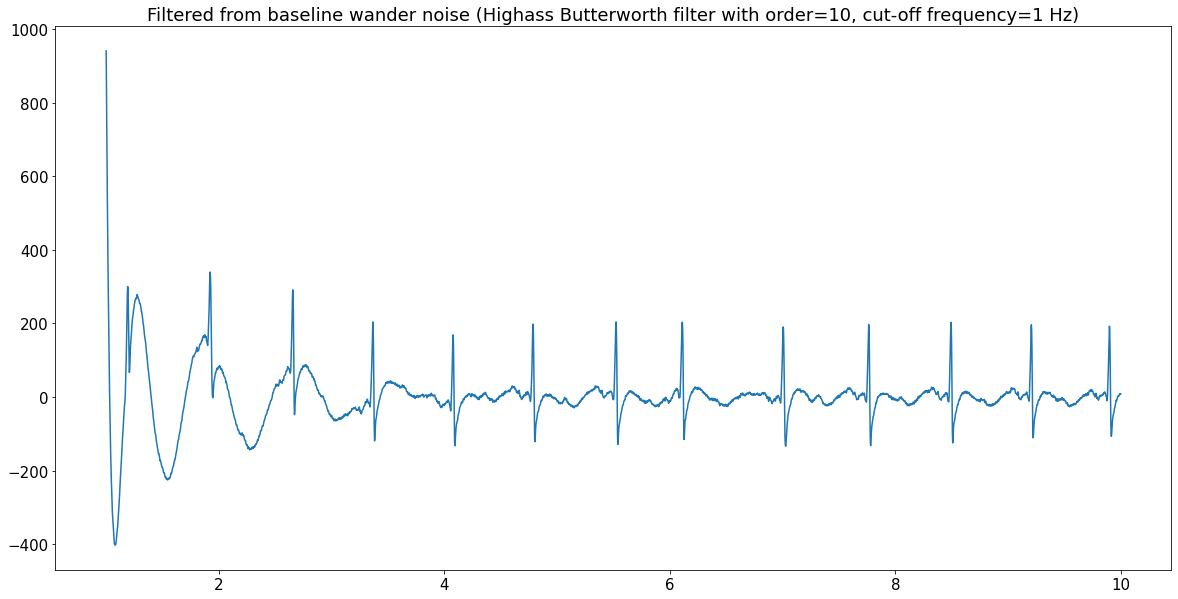

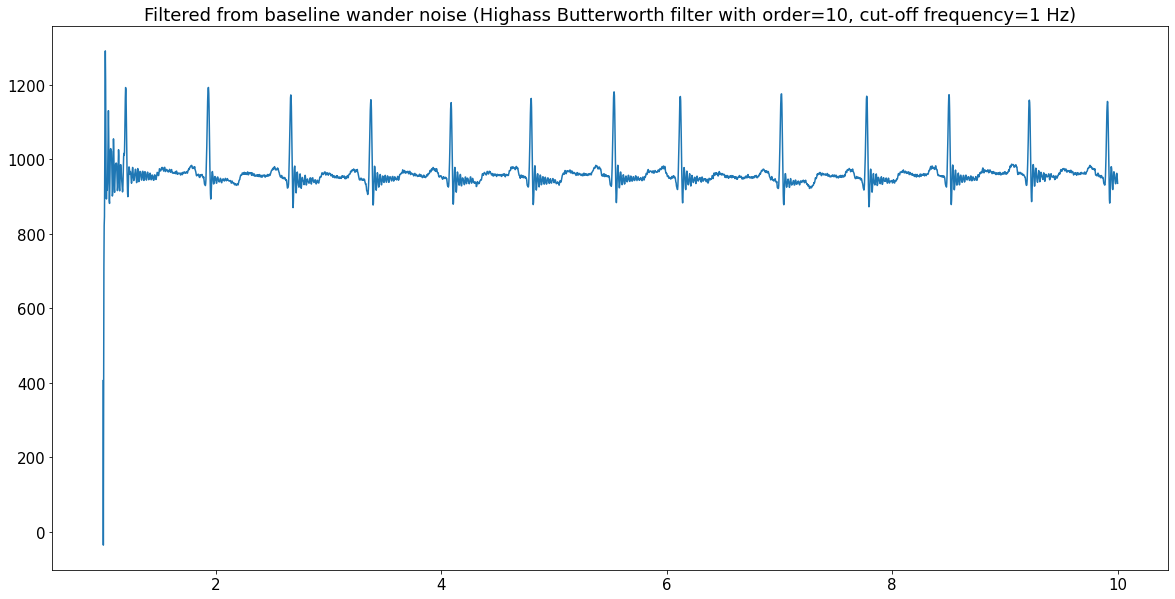

In [ ]:
# BUTTERWORTH FILTER

from scipy import signal
import matplotlib.pyplot as plt

#removal of powerline interference
order=10
cut_off_low=30
sos= signal.butter(order,cut_off_low,btype='lowpass',output='sos',fs=360)
pwr_filtered=signal.sosfilt(sos,pwrline_ecg)

#removal of baseline wander
order=10
cut_off_high=1
sos= signal.butter(order,cut_off_high,btype='highpass',output='sos',fs=360)
baseline_filtered=signal.sosfilt(sos,baseline_ecg)

order=10
sos= signal.butter(order,(42,58),btype='bandstop',output='sos',fs=360)
noisy_filtered=signal.sosfilt(sos,pwrline_ecg)

plt.figure(figsize=(20,4))
plt.plot(t,ecg.T)
plt.title('Original ECG')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t,pwr_filtered.T)
plt.title(f'Filtered from powerline interference (Lowpass Butterworth filter with order={order}, cut-off frequency={cut_off_low} Hz)')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t,baseline_filtered.T)
plt.title(f'Filtered from baseline wander noise (Highass Butterworth filter with order={order}, cut-off frequency={cut_off_high} Hz)')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t,noisy_filtered.T)
plt.title(f'Filtered from baseline wander noise (Highass Butterworth filter with order={order}, cut-off frequency={cut_off_high} Hz)')
plt.show()

In [ ]:

print(f'PRD for only power line interference with 30 hz Lowpass butterworth = {prd(ecg,pwr_filtered)} %')
print(f'PRD for only base line wander noise with 1 hz Highpass butterworth = {prd(ecg,baseline_filtered)} %')
print(f'PRD for both power line interference and base line wander with 50 hz Bandstop butterworth = {prd(ecg,noisy_filtered)} %')


PRD for only power line interference with 30 hz Lowpass butterworth = 16.58364228229298 %
PRD for only base line wander noise with 1 hz Highpass butterworth = 2791.7133149159145 %
PRD for both power line interference and base line wander with 50 hz Bandstop butterworth = 4.42879756730062 %


PRD after applying synchronous averaging to the noisy ECG = 0.31580277444370386 %


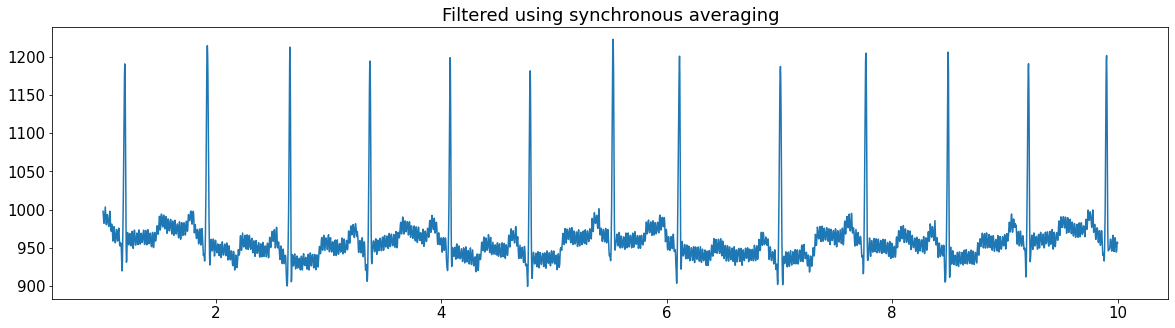

In [ ]:
# SYNCHRONOUS AVERAGING

num_iter=100
sum_signal=np.zeros((1,3600))

for iter in range(num_iter):
  zero_mean_noise=100*np.sin(2*np.pi*50*t + (np.random.randn(1)*2*np.pi)[0]) + 100*np.sin(2*np.pi*0.5*t + (np.random.randn(1)*2*np.pi)[0])
  noisy_ecg = ecg + zero_mean_noise
  sum_signal=sum_signal+noisy_ecg

filtered_signal=sum_signal/num_iter
print(f'PRD after applying synchronous averaging to the noisy ECG = {prd(ecg,filtered_signal)} %')

plt.figure(figsize=(20,5))
plt.plot(t,filtered_signal.T)
plt.title(f'Filtered using synchronous averaging')
plt.show()

PRD after applying hanning filter to the noisy ECG = 26.930451350076158 %


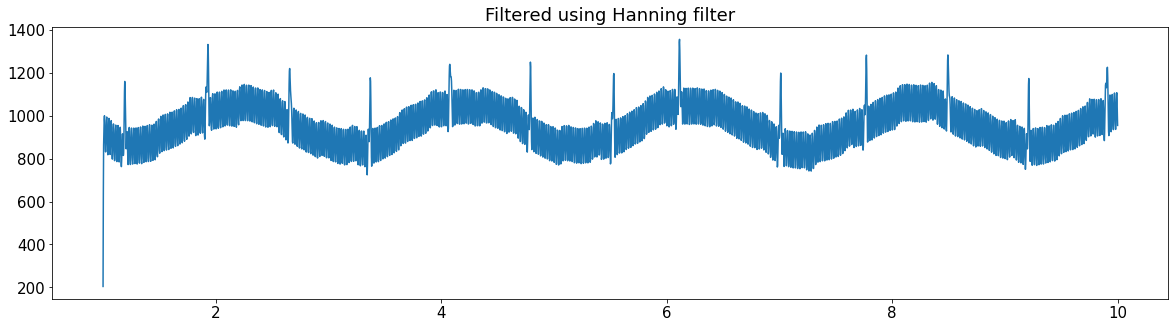

In [ ]:
# HANNING FILTER

ecg_filt=[noisy_ecg.T[0]/4,0.25*(noisy_ecg.T[0] + (2*noisy_ecg.T[1])) ]
for i in range(2,3600):
  x=0.25*(noisy_ecg.T[i] + (noisy_ecg.T[i-1]*2)+ noisy_ecg.T[i-2])
  ecg_filt.append(x)
ecg_filt=np.reshape(np.array(ecg_filt),(1,3600))
print(f'PRD after applying hanning filter to the noisy ECG = {prd(ecg,ecg_filt)} %')

plt.figure(figsize=(20,5))
plt.plot(t,ecg_filt.T)
plt.title(f'Filtered using Hanning filter')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: invalid value encountered in true_divide
  res *= (1 - noise / lVar)


PRD after applying Wiener filter to the noisy ECG = nan %  with window-size = 1
PRD after applying Wiener filter to the noisy ECG = 631.3168509822266 %  with window-size = 2
PRD after applying Wiener filter to the noisy ECG = 1095.7619258583002 %  with window-size = 3
PRD after applying Wiener filter to the noisy ECG = 1383.2254634837795 %  with window-size = 4
PRD after applying Wiener filter to the noisy ECG = 1573.808181229553 %  with window-size = 5
PRD after applying Wiener filter to the noisy ECG = 1710.5168502429751 %  with window-size = 6
PRD after applying Wiener filter to the noisy ECG = 1811.4212959145302 %  with window-size = 7
PRD after applying Wiener filter to the noisy ECG = 1889.313715449297 %  with window-size = 8
PRD after applying Wiener filter to the noisy ECG = 1950.3364986577485 %  with window-size = 9
PRD after applying Wiener filter to the noisy ECG = 1999.5889692219748 %  with window-size = 10
PRD after applying Wiener filter to the noisy ECG = 2040.5482698935

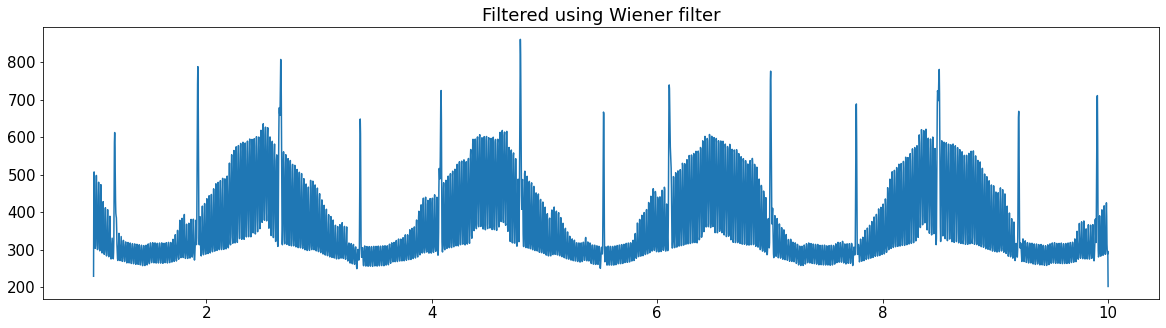

In [ ]:
# WIENER FILTER
import scipy
baseline=100*np.sin(2*np.pi*0.5*t)
pwrline=100*np.sin(2*np.pi*50*t)   
noisy_ecg=ecg+baseline+pwrline

#noise_power=np.sum((ecg-noisy_ecg)**2)/3600
for i in range(1,16):
  ecg_filt=scipy.signal.wiener(noisy_ecg,mysize=i)
  print(f'PRD after applying Wiener filter to the noisy ECG = {prd(ecg,ecg_filt)} %  with window-size = {i}')

ecg_filt=scipy.signal.wiener(noisy_ecg,mysize=3)
plt.figure(figsize=(20,5))
plt.plot(t,ecg_filt.T)
plt.title(f'Filtered using Wiener filter')
plt.show()